In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as StandardScaler

In [2]:
df_train=pd.read_csv('D:\\ANALYTICS\\KAGGLE\\train.csv')

In [3]:
df_test=pd.read_csv('D:\\ANALYTICS\\KAGGLE\\test.csv')

In [4]:
df_train.info()
print('-'*41)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
train_bkp=df_train.copy()
test_bkp=df_test.copy()

In [10]:
df_train.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [11]:
df_test.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [12]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [13]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_train.describe(include=['O'])

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Brown, Mr. Thomas William Solomon",male,S
freq,1,577,644


In [18]:
df_test.describe()
#print('-'*41)
#df_test.describe(include=['O'])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
df_test.describe(include=['O'])

,Name,Sex,Embarked
count,418,418,418
unique,418,2,3
top,"Rogers, Mr. Reginald Harry",male,S
freq,1,266,270


In [21]:
df_train[['Sex','Survived']].groupby(by='Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [22]:
df_train[['Embarked','Survived']].groupby(by='Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [24]:
df_train[['Pclass','Survived']].groupby(by=df_train['Pclass'].astype('category')).mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


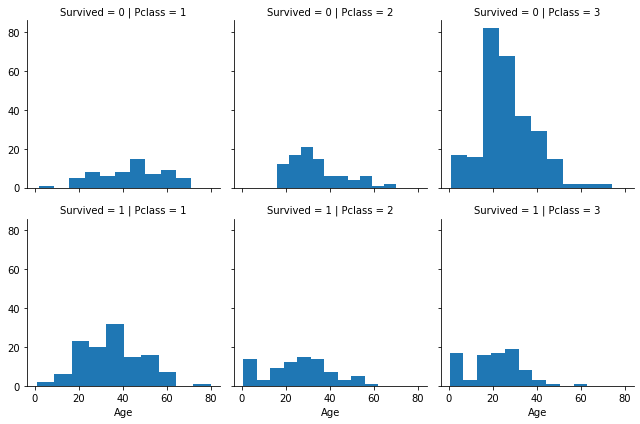

In [31]:
g=sns.FacetGrid(df_train,row='Survived',col='Pclass')#,col='Survived')
g.map(plt.hist,'Age')

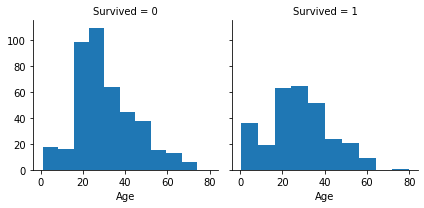

In [36]:
g=sns.FacetGrid(df_train,col='Survived')
g.map(plt.hist,'Age')

In [15]:
df_train.drop('Fare',axis=1,inplace=True)
df_test.drop('Fare',axis=1,inplace=True)

In [8]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


In [16]:
combine=[df_train,df_test]

In [17]:
for dataset in combine:
    dataset.loc[dataset['Sex']=='male','Sex']=0
    dataset.loc[dataset['Sex']=='female','Sex']=1

In [18]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,S


In [19]:
n1=pd.isnull(df_train['Age'])
df_train[n1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
5,0,3,"Moran, Mr. James",0,NaN,0,0,Q
17,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,S
19,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,C
26,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,Q
...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",0,NaN,0,0,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,S
868,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,S
878,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,S


In [20]:
n2=pd.isnull(df_test['Age'])
df_test[n2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
10,902,3,"Ilieff, Mr. Ylio",0,NaN,0,0,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",1,NaN,0,0,S
29,921,3,"Samaan, Mr. Elias",0,NaN,2,0,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",1,NaN,1,2,S
36,928,3,"Roth, Miss. Sarah A",1,NaN,0,0,S
...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,Q
410,1302,3,"Naughton, Miss. Hannah",1,NaN,0,0,Q
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,S


In [23]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex']==i) & (dataset['Pclass']==j+1),'Age']=\
            dataset.loc[(dataset['Sex']==i) & (dataset['Pclass']==j+1),'Age'].median()

In [26]:
for dataset in combine:
    dataset['Age']=round(dataset['Age'])

In [29]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,S


In [31]:
for dataset in combine:
    dataset.loc[dataset['Embarked']=='C','Embarked']=1
    dataset.loc[dataset['Embarked']=='Q','Embarked']=2
    dataset.loc[dataset['Embarked']=='S','Embarked']=3

In [32]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,3


In [33]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,"Kelly, Mr. James",0,34.0,0,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,3
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3


In [51]:
bins=[0,16,32,48,80,np.inf]
labels=['1','2','3','4','5']
for dataset in combine:
    dataset.loc[dataset['Age']==0,'Age']=1
for dataset in combine:
    dataset['AgeBand']=pd.cut(dataset['Age'],bins,labels=labels)

In [52]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,3,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,3,3


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Embarked  889 non-null    object  
 8   AgeBand   891 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 56.9+ KB


In [54]:
df_train['AgeBand']=df_train['AgeBand'].astype('int64')

In [57]:
df_train.loc[df_train['Emabrked'].isnull(),'Embarked']=3

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeBand
61,1,1,"Icard, Miss. Amelie",1,38.0,0,0,NaN,3
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,NaN,4


In [60]:
df_train.loc[df_train['Embarked'].isnull(),'Embarked']=3

In [61]:
df_train[df_train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeBand


In [62]:
df_test.info()
print('-'*41)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Embarked     418 non-null    object  
 8   AgeBand      418 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 26.9+ KB
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   S

In [68]:
for data in combine:
    data['Embarked']=data['Embarked'].astype('int64')
    data['Sex']=data['Sex'].astype('int64')
    data['AgeBand']=data['AgeBand'].astype('int64')

In [69]:
df_test.info()
print('-'*41)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Embarked     418 non-null    int64  
 8   AgeBand      418 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 29.5+ KB
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null   

In [74]:
for dframe in combine:
    dframe['Family']=1
    dframe.loc[(dframe['SibSp']+dframe['Parch'])==0,'Family']=0

In [79]:
df_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeBand,Family
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,2,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,3,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,3,2,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3,3,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,3,3,0
5,0,3,"Moran, Mr. James",0,25.0,0,0,2,2,0
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,3,4,0
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,3,1,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,3,2,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,1,1,1


In [76]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeBand,Family
0,892,3,"Kelly, Mr. James",0,34.0,0,0,2,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,3,3,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,2,4,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,3,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3,2,1


In [80]:
df_test.info()
print('-'*41)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Embarked     418 non-null    int64  
 8   AgeBand      418 non-null    int64  
 9   Family       418 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 32.8+ KB
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-nu

In [81]:
train_bkp2=df_train.copy()
test_bkp2=df_test.copy()

In [82]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [83]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [85]:
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [86]:
for dframe in combine:
    dframe.drop(['Name','Age','SibSp','Parch'],axis=1,inplace=True)

In [87]:
df_test.info()
print('-'*41)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Sex          418 non-null    int64 
 3   Embarked     418 non-null    int64 
 4   AgeBand      418 non-null    int64 
 5   Family       418 non-null    int64 
 6   Title        418 non-null    object
dtypes: int64(6), object(1)
memory usage: 23.0+ KB
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    int64 
 3   Embarked  891 non-null    int64 
 4   AgeBand   891 non-null    int64 
 5   Family    891 non-null    int64 
 6   Title     891 non-nul

In [88]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [89]:
df_test.info()
print('-'*41)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Embarked     418 non-null    int64
 4   AgeBand      418 non-null    int64
 5   Family       418 non-null    int64
 6   Title        418 non-null    int64
dtypes: int64(7)
memory usage: 23.0 KB
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Embarked  891 non-null    int64
 4   AgeBand   891 non-null    int64
 5   Family    891 non-null    int64
 6   Title     891 non-null    int64
dtypes: int64(7)
m

In [90]:
test_Passngr_id=df_test['PassengerId']

In [91]:
df_test.drop('PassengerId',axis=1,inplace=True)

In [92]:
X_train=df_train.drop('Survived',axis=1)
y=df_train['Survived']

In [95]:
X_test=df_test.copy()

In [96]:
X_test.head()

,Pclass,Sex,Embarked,AgeBand,Family,Title
0,3,0,2,3,0,1
1,3,1,3,3,1,3
2,2,0,2,4,0,1
3,3,0,3,2,0,1
4,3,1,3,2,1,3


In [93]:
X_train.head()

,Pclass,Sex,Embarked,AgeBand,Family,Title
0,3,0,3,2,1,1
1,1,1,1,3,1,3
2,3,1,3,2,0,2
3,1,1,3,3,1,3
4,3,0,3,3,0,1


In [94]:
dclf=DecisionTreeClassifier()
dclf.fit(X_train,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
dclf_pred=dclf.predict(X_test)

In [99]:
dclf.score(X_train,y)

0.8406285072951739

In [100]:
rfcl=RandomForestClassifier(n_estimators=350)
rfcl.fit(X_train,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
rfcl_pred=rfcl.predict(X_test)

In [102]:
rfcl.score(X_train,y)

0.8406285072951739

In [103]:
loreg=LogisticRegression()
loreg.fit(X_train,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
log_pred=loreg.predict(X_test)

In [105]:
loreg.score(X_train,y)

0.8103254769921436

In [106]:
data={'PassengerId':test_Passngr_id,'Survived':rfcl_pred}

In [107]:
df_final=pd.DataFrame(data)

In [108]:
df_final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [109]:
df_final.to_csv('D:\\ANALYTICS\\KAGGLE\\MySubmisison_05092020.csv')